In [ ]:
# Exo11
# Exercise: Train and fine-tune an SVM regressor on the California housing dataset. 
# You can use the original dataset rather than the tweaked version we used in Chapter 2. 
# The original dataset can be fetched using sklearn.datasets.fetch_california_housing(). 
# The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, 
# so for hyperparameter tuning you should use much less instances (e.g., 2,000), 
# to test many more hyperparameter combinations. What is your best model's RMSE?

# we ball

In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(data_home="Exo11/dataset", as_frame=True)

X = housing.data
y = housing.target

In [9]:
#split that shit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=67)

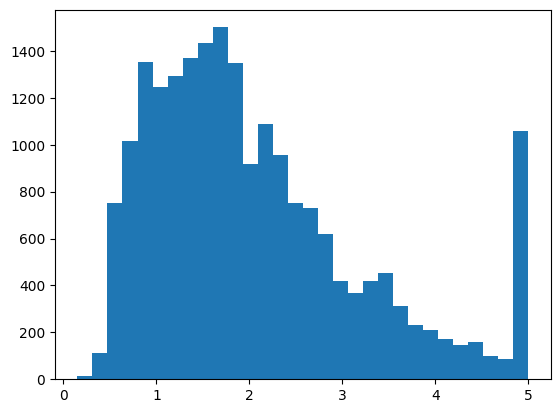

In [29]:
import matplotlib.pyplot as plt

plt.hist(y,bins=30) #shitty ass capping
plt.show()

In [78]:
# we of course will scale it as always but this time with a pipeline because we work fancy
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def model_selector(models):
    best_score = -np.inf
    best_model = None
    
    for name, model in models:
        scores = cross_val_score(model, X_train, y_train, cv=4, scoring="neg_root_mean_squared_error", n_jobs=-1)
        mean_score = np.mean(scores)
        print(f"{name} CV mean score: {-mean_score:.4f}")
        
        if mean_score > best_score:
            best_score = mean_score
            best_model = model

    print(f"\nBest model: {best_model.__class__.__name__} with CV score: {-best_score:.4f}")
    return best_model, best_score

models = {
    ("ass guy", make_pipeline(StandardScaler(), SVR())),
    ("Lined ass guy", make_pipeline(StandardScaler(), LinearSVR(random_state=67))),
    ("i know my goat will win", make_pipeline(StandardScaler(), SGDRegressor(random_state=67))),
}

da_goat = model_selector(models)

# results:
# LinearSVR: 1.6877
# SVR: 1.1706
# SDGRegressor: 992362729475776.7500 :sob:
# ever reducing the learning rate kept it at 6 gazillion RMSE instead of 9 (y is between 0 and 5 btw)
# nvm forgot to scale the features

# results (after scaling):
# LinearSVR: 1.4693
# SVR: 0.5909 (impressive)
# SDGRegressor: 12082.6800 STILL ASS ON GOD

# SVR wins

Lined ass guy CV mean score: 1.4693


ass guy CV mean score: 0.5909
i know my goat will win CV mean score: 12082.8600

Best model: Pipeline with CV score: 0.5909


In [49]:
da_goat = make_pipeline(StandardScaler(), SVR())

In [65]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

param_grid = {
    "svr__C": [20,25,30],
    "svr__kernel": ["rbf"],
}

grid = GridSearchCV(da_goat, param_grid, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=4)

grid.fit(X_train[2000:], y_train[2000:])

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [20, 25, 30], 'svr__kernel': ['rbf']},
             scoring='neg_root_mean_squared_error')

In [69]:
grid_res = pd.DataFrame(grid.cv_results_)
grid_res.sort_values(by="rank_test_score")
# best score was C:30 kernel:rbf
# trying out auto or scale for gamma didnt change a lot so dropped them when training before
# the score to beat is a mean score of 0.5628 on the 2000 instances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,param_svr__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
2,32.202404,0.275217,3.443996,0.108838,30,rbf,"{'svr__C': 30, 'svr__kernel': 'rbf'}",-0.556290,-0.566369,-0.562786,-0.565755,-0.562800,0.003995,1
1,29.682710,0.351824,4.227248,0.087107,25,rbf,"{'svr__C': 25, 'svr__kernel': 'rbf'}",-0.555582,-0.566185,-0.563515,-0.566758,-0.563010,0.004460,2
0,25.002799,0.537542,4.993490,0.032143,20,rbf,"{'svr__C': 20, 'svr__kernel': 'rbf'}",-0.556872,-0.566700,-0.564672,-0.568364,-0.564152,0.004402,3


In [72]:
grid_goat = grid.best_estimator_
rmse = cross_val_score(grid_goat, X_train, y_train, cv=4, scoring="neg_root_mean_squared_error")
print("cross val rmse avg:", rmse.mean()) #0.56201 slightly better but we are hitting a cap

cross val rmse avg: -0.5620160806932539


In [76]:
# moment of silence for the final score...
from sklearn.metrics import root_mean_squared_error

predictions = grid_goat.predict(X_test)
root_mean_squared_error(y_test, predictions) #0.5835225 model slightly overfitting ig

0.583522593408706

In [77]:
# one more with C=25

final_model = make_pipeline(StandardScaler(), SVR(C=25))

final_model.fit(X_train, y_train)

predictions = final_model.predict(X_test)
root_mean_squared_error(y_test, predictions) #0.5799942 good enough ig

# result on the book was close to this one even tho mine had a small improvement of like 0.01 so i take the W

0.579994290636987